# Framing the “Middle Class” and “Tax Fairness” in White House Statements  

*Intro to Text Analysis in Python – Final Project*  
Student: Kelly Sun  


## Introduction & Research Question

For the final project in *Intro to Text Analysis in Python*, I examine how the Biden administration talks about the “middle class” and “tax fairness.” Both phrases appear constantly in American politics, but it is not always clear what they mean in practice. My research question is: **How does the White House frame the “middle class / working families” compared to “tax fairness and the wealthy” in official economic statements?** Using web-scraped Briefing Room statements and a small toolkit of text-analysis methods, I compare the vocabulary, tone, and named actors associated with each frame.


## Data Collection and Corpus

The dataset comes from the White House archives of “Statements & Releases.” Using `requests` and `BeautifulSoup`, I scraped the archive and extracted the title, date, URL, and main article text for **200** Briefing Room statements (The White House, n.d.). After filtering for economic and tax-related content, the final analysis subset `econ_df` contains **46** statements with at least one of the two frames. I kept only English-language items and stored them in a pandas DataFrame called `df`. To keep the project reproducible, all scraping, cleaning, and analysis steps are written as code in the notebook `finalproject_whitehouse_framing.ipynb`, which is hosted in a GitHub repository (link provided with my submission). Anyone can rerun the notebook to rebuild the same corpus I use here.

From this raw corpus, I then built an analysis subset focused on economic and tax topics. First, I defined two sets of framing keywords. The **middle-class / working-families** set includes phrases such as “middle class,” “working families,” “family budget,” and “cost of living.” The **tax-fairness / wealthy** set includes “tax,” “fair share,” “billionaires,” “wealthiest,” and “loopholes.” Using helper functions, I tagged each statement with two Boolean columns, `middle_class_frame` and `tax_fairness_frame`, depending on whether the lower-cased text contained at least one keyword. Because many Briefing Room items discuss multiple policy areas, I also wrote a function to extract only the sentences that contain any framing keyword. This produced a `filtered_text` column that narrows the analysis to the parts of each statement where the middle class or tax fairness is explicitly invoked. Finally, I constructed `econ_df`, which keeps only statements that hit at least one frame and have non-empty `filtered_text`. This is the subset used for the rest of the analysis.


## Text-Analysis Methods and TF–IDF Findings

To compare language across frames, I concatenated the filtered text of all middle-class statements into one corpus and did the same for the tax-fairness statements. Before computing TF–IDF, I cleaned the text by lower-casing, removing non-alphabetic characters, dropping standard English stopwords, and removing high-frequency White House boilerplate words such as “president,” “white house,” “statement,” and “fact sheet.” I then applied `TfidfVectorizer` with unigrams and bigrams (`ngram_range=(1, 2)`, `min_df=2`), which assigns each word or phrase a score based on how distinctive it is for that frame (Pedregosa et al., 2011). To visualize the results, I calculated the difference in TF–IDF scores between frames and plotted the top bigrams for each group in a side-by-side bar chart.

The TF–IDF results suggest that the two frames organize political language at different levels. In the **Middle Class / Working Families** corpus, the most distinctive bigrams cluster around everyday security and care: phrases such as “child care,” “economic security,” and “higher education” connect the middle class to concrete household protections and opportunities. In contrast, the **Tax Fairness / Wealthy** corpus highlights instruments and powerful actors: bigrams such as “tax credits,” “tax cuts,” and “cut billionaires” present economic policy as a tool for reshaping who pays and how resources are allocated. Taken together, these patterns show that the same “middle class” constituency appears in two stories: one about stabilizing fragile day-to-day wellbeing, and another about structural fairness and shifting the tax burden at the top.


## Sentiment and Named-Entity Findings

To get a sense of tone, I complemented the TF–IDF analysis with sentiment scoring. Using the VADER `SentimentIntensityAnalyzer`, I computed a compound sentiment score for each statement’s `filtered_text` (Hutto & Gilbert, 2014). The average score is **0.64** for middle-class / working-families statements and **0.53** for tax-fairness / wealthy statements. Both values are clearly above zero, which fits the genre of official presidential communication that tends to remain positive and forward-looking even when describing problems. The gap between the two frames is noticeable but not huge: middle-class messages are framed in somewhat more upbeat, reassuring language, while tax-fairness messages, although still positive on average, more often combine praise with calls for change in who pays and how the system should be rebalanced.

I also experimented with named-entity recognition (NER) using spaCy (spaCy, n.d.). Applying NER to the filtered sentences and keeping only people, organizations, places, and groups, I built simple frequency tables for each frame. In the middle-class / working-families frame, the entities that show up disproportionately often are tied to national identity and the administration itself: the words “American,” “Americans,” “America,” and “U.S.,” as well as names like “Biden,” “Harris,” “Medicare,” and “the Biden-Harris Administration.” In other words, talk about the middle class is closely linked to “ordinary Americans” and to the current administration as the actor providing benefits, especially through Medicare.

In the tax-fairness frame, by contrast, the small set of entities that are more frequent are explicit political or industry targets: “Republicans,” “Big Oil,” “Trump,” and individual legislators such as “Frank Pallone.” These names appear only or mainly in tax-fairness-tagged sentences in this sample, and rarely in the middle-class context. This pattern suggests that when the White House talks about the middle class it foregrounds a broad national community and its own governing role, whereas tax-fairness language is more likely to single out specific actors who should change their behavior or pay more. NER therefore adds a “who” dimension that complements the “what” captured by the TF–IDF bigram comparison.


## Limitations and Use of Generative AI

There are several limitations to this project. The dataset covers only a slice of the White House archive and only one administration, so the findings cannot be generalized to all U.S. political communication. My framing labels depend on simple keyword lists and may miss more subtle or ironic uses of “middle class” or “tax” language. TF–IDF treats all documents as equally important and ignores word order beyond bigrams, and VADER’s lexicon-based approach may underestimate the complexity of policy rhetoric. Going forward, it would be valuable to extend the corpus to more years and to compare across administrations, or to use contextual embeddings to detect frames without pre-defined keyword lists.


## Conclusion

Despite these limitations, the project shows how relatively simple text-analysis tools can reveal patterns that I would have missed by just reading a few statements manually. By combining scraping, TF–IDF, sentiment analysis, and NER, I am able to trace how the Biden White House uses the “middle class” both as a vulnerable group needing concrete protections and as a moral reference point for justifying changes to the tax system. All code, intermediate outputs, and charts are available in the GitHub repository linked with this project.


## References

- The White House. *Briefing Room – Statements and Releases*. Retrieved from https://www.whitehouse.gov/briefing-room/statements-releases/
- Hutto, C. J., & Gilbert, E. (2014). *VADER: A parsimonious rule-based model for sentiment analysis of social media text*. Proceedings of the International AAAI Conference on Web and Social Media.
- spaCy Authors. *spaCy Documentation*. Retrieved from https://spacy.io
- Pedregosa, F., et al. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.




---



## 0. Import Dependencies & Environment Setup

In [4]:
!pip install vaderSentiment
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import requests, time, re
from urllib.parse import urljoin
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
nlp = spacy.load("en_core_web_sm")

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.unicode_minus"] = False
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Data Collection

I collected official White House Briefing Room “Statements & Releases” from the Biden administration that relate to economics and public policy.

- **Source:** WhiteHouse.gov → Briefing Room → Statements & Releases  
- **Method:** Python web scraping using `requests` and `BeautifulSoup` (then storing the results in a DataFrame called `df`), or loading a pre-saved CSV exported from that scraping script.


In [6]:
BASE_LIST_URL = "https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/"
BASE_DOMAIN   = "https://bidenwhitehouse.archives.gov"

headers = {
    "User-Agent": "Mozilla/5.0 (Colab student project; contact: example@student.edu)"
}

def fetch_list_page(page=1):
    if page == 1:
        url = BASE_LIST_URL
    else:
        url = f"{BASE_LIST_URL}page/{page}/"

    print(f"Fetching list page {page}: {url}")
    resp = requests.get(url, headers=headers)
    resp.raise_for_status()
    return resp.text


def parse_list_page(html):
    soup = BeautifulSoup(html, "html.parser")
    items = []

    articles = soup.find_all("article")
    if not articles:
        articles = soup.find_all("h2")

    for art in articles:
        h2 = art.find("h2") if hasattr(art, "find") else art
        if not h2:
            continue
        a = h2.find("a")
        if not a or not a.get("href"):
            continue

        title = a.get_text(strip=True)
        href  = a["href"]
        url   = urljoin(BASE_DOMAIN, href)

        date_text = None
        time_tag = art.find("time") if hasattr(art, "find") else None
        if time_tag:
            date_text = time_tag.get_text(strip=True)

        items.append({
            "title": title,
            "url": url,
            "date_raw": date_text
        })

    return items


def fetch_article_text(url, sleep=0.5):
    print(f"  Fetching article: {url}")
    resp = requests.get(url, headers=headers)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.text, "html.parser")

    article = soup.find("article")
    if article:
        text = article.get_text(separator=" ", strip=True)
    else:
        main = soup.find("main")
        if main:
            text = main.get_text(separator=" ", strip=True)
        else:
            text = soup.get_text(separator=" ", strip=True)

    time.sleep(sleep)  # polite
    return text


all_items = []
max_pages = 20

for page in range(1, max_pages + 1):
    try:
        html = fetch_list_page(page)
    except requests.HTTPError as e:
        print(f"  HTTP error on page {page}: {e} — stop.")
        break

    page_items = parse_list_page(html)
    print(f"  Found {len(page_items)} items on page {page}")
    if not page_items:
        break
    all_items.extend(page_items)

print("Total list items:", len(all_items))

records = []
for item in all_items:
    try:
        text = fetch_article_text(item["url"])
    except Exception as e:
        print(f"    !!! Failed to fetch article: {item['url']} ({e})")
        continue

    rec = {
        "title": item["title"],
        "url": item["url"],
        "date_raw": item["date_raw"],
        "text": text,
    }
    records.append(rec)

print("Total scraped statements with text:", len(records))
df = pd.DataFrame(records)
display(df.head())


Fetching list page 1: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/
  Found 10 items on page 1
Fetching list page 2: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/2/
  Found 10 items on page 2
Fetching list page 3: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/3/
  Found 10 items on page 3
Fetching list page 4: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/4/
  Found 10 items on page 4
Fetching list page 5: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/5/
  Found 10 items on page 5
Fetching list page 6: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/6/
  Found 10 items on page 6
Fetching list page 7: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/7/
  Found 10 items on page 7
Fetching list page 8: https://bidenwhitehouse.archives.gov/briefing-room/statements-releases/page/8/
  Found 10

,title,url,date_raw,text
0,Statement from President JoeBiden,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
1,Statement from President JoeBiden on the Passi...,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
2,Statement from President JoeBiden,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
3,Statement from President JoeBiden on ClemencyA...,https://bidenwhitehouse.archives.gov/briefing-...,"January 19, 2025","January 19, 2025 Statement from President Joe ..."
4,FACT SHEET: The Biden-⁠Harris Administration C...,https://bidenwhitehouse.archives.gov/briefing-...,"January 19, 2025","January 19, 2025 FACT SHEET: The Biden- ⁠ Harr..."


## 2. Raw Data Snapshot

Below is a quick look at the raw scraped DataFrame `df`.

In [7]:
print("Number of raw statements in df:", len(df))
df.head(5)


Number of raw statements in df: 200


,title,url,date_raw,text
0,Statement from President JoeBiden,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
1,Statement from President JoeBiden on the Passi...,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
2,Statement from President JoeBiden,https://bidenwhitehouse.archives.gov/briefing-...,"January 20, 2025","January 20, 2025 Statement from President Joe ..."
3,Statement from President JoeBiden on ClemencyA...,https://bidenwhitehouse.archives.gov/briefing-...,"January 19, 2025","January 19, 2025 Statement from President Joe ..."
4,FACT SHEET: The Biden-⁠Harris Administration C...,https://bidenwhitehouse.archives.gov/briefing-...,"January 19, 2025","January 19, 2025 FACT SHEET: The Biden- ⁠ Harr..."


In [8]:

def clean_text_basic(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["text"] = df["text"].apply(clean_text_basic)
df["text_lower"] = df["text"].str.lower()

print("example：")
print(df["text"].iloc[0][:400])


example：
January 20, 2025 Statement from President Joe Biden Home Briefing Room Statements and Releases I am issuing pardons to Gerald G. Lundergan and Ernest William Cromartie. I am also commuting the life sentence imposed on Leonard Peltier so that he serves the remainder of his sentence in home confinement. **** My family has been subjected to unrelenting attacks and threats, motivated solely by a desir


## 3. Framing keywords and classification

To classify each statement into two framing groups, I define keyword lists for:

- **Middle Class / Working Families** (e.g., “middle class”, “working families”, “family budget”, “cost of living”)  
- **Tax Fairness / Wealthy** (e.g., “tax”, “fair share”, “billionaires”, “wealthiest”, “loopholes”)

I then create two Boolean columns, `middle_class_frame` and `tax_fairness_frame`, indicating whether each statement contains at least one of the relevant keywords.

In [9]:

middle_class_keywords = [
    "middle class", "working families", "working- and middle-class",
    "american families", "families with children", "family budget",
    "family paychecks", "families' budgets", "household", "households",
    "good-paying jobs", "good paying jobs", "union jobs",
    "wages", "paychecks", "income support",
    "cost of living", "lower costs", "lowering costs",
    "child care", "childcare", "affordable child care",
    "prescription drugs", "drug prices",
    "economic security", "financial security",
]

tax_fairness_keywords = [
    "pay their fair share", "fair share",
    "fairer tax system", "tax fairness",
    "tax code", "tax system",
    "tax breaks", "tax break", "tax loopholes", "loopholes",
    "tax cuts", "tax cut", "tax relief", "tax reform",
    "tax credits", "tax credit",
    "billionaires", "millionaires", "wealthiest", "wealthy",
    "corporate tax", "corporate minimum tax", "global minimum tax",
    "tax cheats", "tax evasion", "tax avoidance",
    "top one percent", "top 1 percent",
]


def has_middle_class_frame(text):
    t = (text or "").lower()
    return any(kw in t for kw in middle_class_keywords)


def has_tax_fairness_frame(text):
    t = (text or "").lower()
    return any(kw in t for kw in tax_fairness_keywords)


df["middle_class_frame"] = df["text_lower"].apply(has_middle_class_frame)
df["tax_fairness_frame"] = df["text_lower"].apply(has_tax_fairness_frame)

print("Middle Class framing statements:", df["middle_class_frame"].sum())
print("Tax Fairness framing statements:", df["tax_fairness_frame"].sum())

display(
    df[df["middle_class_frame"] | df["tax_fairness_frame"]][
        ["title", "date_raw", "middle_class_frame", "tax_fairness_frame"]
    ].head(20)
)


Middle Class framing statements: 42
Tax Fairness framing statements: 15


,title,date_raw,middle_class_frame,tax_fairness_frame
0,Statement from President JoeBiden,"January 20, 2025",True,False
2,Statement from President JoeBiden,"January 20, 2025",True,False
4,FACT SHEET: The Biden-⁠Harris Administration C...,"January 19, 2025",True,True
9,REPORT: Investing in America Report: Todayâs...,"January 17, 2025",True,True
17,Statement from President JoeBiden on the Next ...,"January 17, 2025",True,False
19,FACT SHEET: Biden-⁠Harris Administration Celeb...,"January 16, 2025",True,False
32,Statement from President JoeBiden,"January 15, 2025",True,False
35,"FACT SHEET: Marking Historic Progress, the Bid...","January 15, 2025",True,False
36,FACT SHEET: New Executive Order on Strengtheni...,"January 15, 2025",True,False
37,The Biden-⁠Harris AdministrationRecord,"January 15, 2025",True,True


## 4. Extracting relevant framing sentences

Many White House statements cover multiple issues in one document.  
To focus on economic and tax-related language, I extract only sentences that contain at least one of the framing keywords (middle class / working families / tax / fairness / wealthy).

The result is stored in:
- `filtered_text`: the subset of sentences containing framing keywords  
- `filtered_text_lower`: a lowercased version for later analysis


In [10]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

framing_keywords = list(set(middle_class_keywords + tax_fairness_keywords))

def extract_relevant_sentences(text):

    if not isinstance(text, str):
        return ""

    sentences = nltk.sent_tokenize(text)
    relevant = []
    for s in sentences:
        s_lower = s.lower()
        if any(kw in s_lower for kw in framing_keywords):
            relevant.append(s)

    return " ".join(relevant)

df["filtered_text"] = df["text"].apply(extract_relevant_sentences)
df["filtered_text_lower"] = df["filtered_text"].str.lower()

print("=== Original vs After Filtered ===")
print("---- Original ----")
print(df["text"].iloc[0][:500])
print("\n---- After Filtered ----")
print(df["filtered_text"].iloc[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


=== Original vs After Filtered ===
---- Original ----
January 20, 2025 Statement from President Joe Biden Home Briefing Room Statements and Releases I am issuing pardons to Gerald G. Lundergan and Ernest William Cromartie. I am also commuting the life sentence imposed on Leonard Peltier so that he serves the remainder of his sentence in home confinement. **** My family has been subjected to unrelenting attacks and threats, motivated solely by a desire to hurt meâthe worst kind of partisan politics. Unfortunately, I have no reason to believe these

---- After Filtered ----
But baseless and politically motivated investigations wreak havoc on the lives, safety, and financial security of targeted individuals and their families.


## 5. Build analysis subset (`econ_df`)

From the scraped statements DataFrame `df`, I construct an analysis subset called `econ_df`.  
This subset keeps only statements that:
- are related to economic / tax issues, and  
- contain at least one sentence with a **middle-class / working-families** frame or a **tax / fairness / wealthy** frame, and  
- have non-empty filtered text.

`econ_df` is the corpus used for the TF–IDF framing comparison in the rest of the notebook.


In [11]:
econ_df = df[
    (df["middle_class_frame"] | df["tax_fairness_frame"])
    & (df["filtered_text"].str.len() > 20)
].copy()

print("economy/tax related statements：", len(econ_df))
display(econ_df[["title", "date_raw", "middle_class_frame", "tax_fairness_frame"]].head(10))


economy/tax related statements： 46


,title,date_raw,middle_class_frame,tax_fairness_frame
0,Statement from President JoeBiden,"January 20, 2025",True,False
2,Statement from President JoeBiden,"January 20, 2025",True,False
4,FACT SHEET: The Biden-⁠Harris Administration C...,"January 19, 2025",True,True
9,REPORT: Investing in America Report: Todayâs...,"January 17, 2025",True,True
17,Statement from President JoeBiden on the Next ...,"January 17, 2025",True,False
19,FACT SHEET: Biden-⁠Harris Administration Celeb...,"January 16, 2025",True,False
32,Statement from President JoeBiden,"January 15, 2025",True,False
35,"FACT SHEET: Marking Historic Progress, the Bid...","January 15, 2025",True,False
36,FACT SHEET: New Executive Order on Strengtheni...,"January 15, 2025",True,False
37,The Biden-⁠Harris AdministrationRecord,"January 15, 2025",True,True


## 6. Data Overview for `econ_df`

Here I show a quick snapshot of the analysis subset, including the number of statements and a few key columns.

In [12]:
print("Number of statements in econ_df:", len(econ_df))
econ_df[["title", "date_raw", "middle_class_frame", "tax_fairness_frame"]].head(10)


Number of statements in econ_df: 46


,title,date_raw,middle_class_frame,tax_fairness_frame
0,Statement from President JoeBiden,"January 20, 2025",True,False
2,Statement from President JoeBiden,"January 20, 2025",True,False
4,FACT SHEET: The Biden-⁠Harris Administration C...,"January 19, 2025",True,True
9,REPORT: Investing in America Report: Todayâs...,"January 17, 2025",True,True
17,Statement from President JoeBiden on the Next ...,"January 17, 2025",True,False
19,FACT SHEET: Biden-⁠Harris Administration Celeb...,"January 16, 2025",True,False
32,Statement from President JoeBiden,"January 15, 2025",True,False
35,"FACT SHEET: Marking Historic Progress, the Bid...","January 15, 2025",True,False
36,FACT SHEET: New Executive Order on Strengtheni...,"January 15, 2025",True,False
37,The Biden-⁠Harris AdministrationRecord,"January 15, 2025",True,True


## 7. Build corpora for each frame

To compare language across frames, I concatenate the filtered text of all statements in each group into two long documents:

- one corpus for **Middle Class / Working Families**  
- one corpus for **Tax Fairness / Wealthy**

These corpora are the inputs to the TF–IDF model.


In [13]:
group_names = ["Middle Class / Working Families", "Tax / Fairness / Wealthy"]

mc_corpus = " ".join(econ_df[econ_df["middle_class_frame"]]["filtered_text"])
tax_corpus = " ".join(econ_df[econ_df["tax_fairness_frame"]]["filtered_text"])

group_texts = [mc_corpus, tax_corpus]

print("Middle Class texts length:", len(mc_corpus))
print("Tax Fairness texts length:", len(tax_corpus))


Middle Class texts length: 57798
Tax Fairness texts length: 33749


## 8. TF–IDF model and custom stopwords

I apply a `TfidfVectorizer` (unigrams and bigrams, `min_df=2`) to the two corpora.  
In addition to standard English stopwords, I remove high-frequency White House boilerplate terms such as “president”, “white house”, “statement”, and “fact sheet” so that the TF–IDF scores focus on substantive policy words.


In [14]:

from nltk.corpus import stopwords
nltk.download('stopwords')

# English stopwords
stop_words = set(stopwords.words("english"))

whitehouse_stopwords = {
    "president", "biden", "administration",
    "white", "house", "white house",
    "united", "states", "american", "americans",
    "congress", "congressional",
    "million", "billion",
    "federal", "national",
    "program", "office", "department", "secretary",
    "press", "release", "briefing", "room",
    "statements", "statement", "fact sheet",
}

stop_words = list(stop_words | whitehouse_stopwords)

vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    max_features=4000,
    ngram_range=(1, 2),
)

X = vectorizer.fit_transform(group_texts)
feature_names = np.array(vectorizer.get_feature_names_out())

print("TF-IDF matrix shape:", X.shape)  # (2, vocab_size)


TF-IDF matrix shape: (2, 4000)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fact', 'sheet'] not in stop_words.
  warnings.warn(


In [15]:
def get_top_terms_for_group(X, feature_names, group_index, top_k=20):
    row = X[group_index].toarray().ravel()
    idx = np.argsort(row)[::-1][:top_k]
    return pd.DataFrame({
        "term": feature_names[idx],
        "tfidf": row[idx]
    })

top_mc  = get_top_terms_for_group(X, feature_names, 0, top_k=20)
top_tax = get_top_terms_for_group(X, feature_names, 1, top_k=20)

print("=== Top TF-IDF terms: Middle Class ===")
display(top_mc)

print("=== Top TF-IDF terms: Tax Fairness ===")
display(top_tax)


=== Top TF-IDF terms: Middle Class ===


,term,tfidf
0,care,0.265987
1,energy,0.227489
2,child,0.213490
3,jobs,0.202990
4,costs,0.171492
5,good,0.153993
6,child care,0.153993
7,tax,0.153993
8,families,0.146993
9,economic,0.136493


=== Top TF-IDF terms: Tax Fairness ===


,term,tfidf
0,energy,0.284824
1,tax,0.262485
2,costs,0.189882
3,care,0.173128
4,jobs,0.167543
5,child,0.161959
6,000,0.145204
7,good,0.139619
8,paying,0.117280
9,families,0.111696


## 9. Distinctive bigrams for each frame

To highlight phrases (rather than single words), I compute TF–IDF scores for bigrams and then take the difference between frames.  
This produces a ranked list of bigrams that are especially distinctive for:

- **Middle Class / Working Families**  
- **Tax Fairness / Wealthy**


In [16]:
mc_scores  = X[0].toarray().ravel()
tax_scores = X[1].toarray().ravel()

term2mc  = dict(zip(feature_names, mc_scores))
term2tax = dict(zip(feature_names, tax_scores))

all_terms = set(term2mc) | set(term2tax)

rows = []
for t in all_terms:
    mc_val  = term2mc.get(t, 0.0)
    tax_val = term2tax.get(t, 0.0)
    diff    = mc_val - tax_val
    rows.append({"term": t, "mc": mc_val, "tax": tax_val, "diff": diff})

diff_df = pd.DataFrame(rows)


diff_df = diff_df[diff_df["term"].str.contains(" ")].copy()


noise_bigrams = {
    "briefing room", "room briefing", "home briefing",
    "statements releases", "releases statements", "white house",
    "fact sheet", "press release",
    "puerto rico", "human rights",
    "supply chain", "supply chains",
    "private sector",
    "tt tla",
}

diff_df = diff_df[~diff_df["term"].isin(noise_bigrams)].copy()

if diff_df.empty:
    diff_df = pd.DataFrame(rows)
    diff_df = diff_df[diff_df["term"].str.contains(" ")].copy()
    print("⚠️ After filtering, no terms remain; using unfiltered bigrams.")

top_mc_diff  = diff_df.sort_values("diff", ascending=False).head(15)
top_tax_diff = diff_df.sort_values("diff", ascending=True).head(15)

print("====== Most distinctive bigrams for Middle Class framing ======")
display(top_mc_diff)

print("====== Most distinctive bigrams for Tax Fairness framing ======")
display(top_tax_diff)


====== Most distinctive bigrams for Middle Class framing ======


,term,mc,tax,diff
1422,child care,0.153993,0.072602,0.081391
1496,economic security,0.076996,0.033509,0.043488
1286,womenâ economic,0.038498,0.011170,0.027329
2500,drug prices,0.024594,0.000000,0.024594
339,union jobs,0.031498,0.011170,0.020329
3807,public private,0.019676,0.000000,0.019676
3099,rural communities,0.019676,0.000000,0.019676
3863,paying union,0.019676,0.000000,0.019676
11,working families,0.024499,0.005585,0.018914
3442,higher education,0.020999,0.005585,0.015414


====== Most distinctive bigrams for Tax Fairness framing ======


,term,mc,tax,diff
50,tax credits,0.045498,0.072602,-0.027104
1081,tax credit,0.045498,0.072602,-0.027104
2890,accelerated pathway,0.000000,0.015698,-0.015698
2761,pathway tax,0.000000,0.015698,-0.015698
1603,operate full,0.000000,0.015698,-0.015698
1591,government continue,0.000000,0.015698,-0.015698
1890,tax cut,0.000000,0.015698,-0.015698
3133,continue operate,0.000000,0.015698,-0.015698
1506,full capacity,0.000000,0.015698,-0.015698
2274,cut billionaires,0.000000,0.015698,-0.015698


## 10. Final visualization of distinctive bigrams

The chart below shows the top distinctive bigrams in each framing group.
- Left: **Middle Class / Working Families**  
- Right: **Tax Fairness / Wealthy**


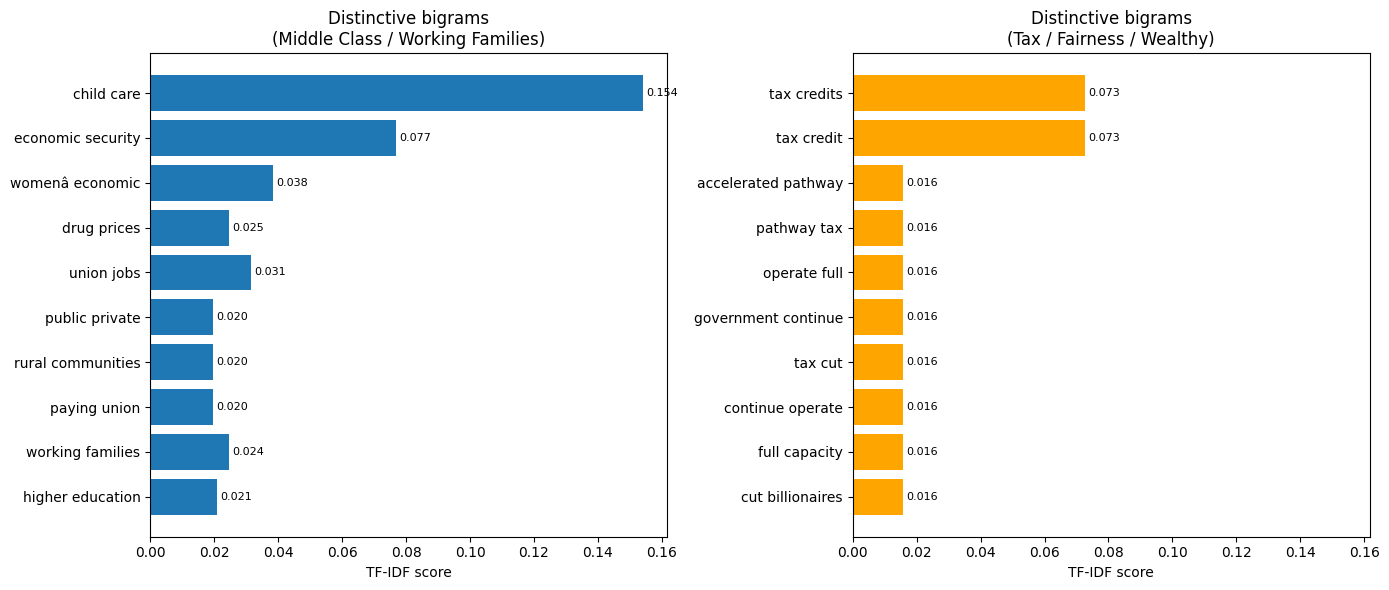

In [17]:

top_mc_plot  = top_mc_diff.head(10).copy()
top_tax_plot = top_tax_diff.head(10).copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# ---- Middle Class ----
ax = axes[0]
terms_mc  = top_mc_plot["term"].values
scores_mc = top_mc_plot["mc"].values
y_mc = np.arange(len(terms_mc))

ax.barh(y_mc, scores_mc)
ax.set_yticks(y_mc)
ax.set_yticklabels(terms_mc)
ax.invert_yaxis()
ax.set_title("Distinctive bigrams\n(Middle Class / Working Families)")
ax.set_xlabel("TF-IDF score")
for x, y in zip(scores_mc, y_mc):
    ax.text(x + 0.001, y, f"{x:.3f}", va="center", fontsize=8)

# ---- Tax Fairness ----
ax = axes[1]
terms_tax  = top_tax_plot["term"].values
scores_tax = top_tax_plot["tax"].values
y_tax = np.arange(len(terms_tax))

ax.barh(y_tax, scores_tax, color="orange")
ax.set_yticks(y_tax)
ax.set_yticklabels(terms_tax)
ax.invert_yaxis()
ax.set_title("Distinctive bigrams\n(Tax / Fairness / Wealthy)")
ax.set_xlabel("TF-IDF score")
for x, y in zip(scores_tax, y_tax):
    ax.text(x + 0.001, y, f"{x:.3f}", va="center", fontsize=8)

plt.tight_layout()
plt.show()


### Key findings from the bigram chart

- **Middle Class / Working Families** framing clusters around everyday security and care: bigrams such as *“child care”*, *“economic security”*, *“drug prices”*, *“union jobs”*, and *“paying union”* tie the middle class to concrete household protections and labor conditions.  
- **Tax Fairness / Wealthy** framing leans toward system-level instruments and elite actors: bigrams such as *“tax credits”*, *“tax cuts”*, *“accelerated pathway”*, and *“cut billionaires”* present policy as a tool for reshaping who pays and how resources are allocated.
- Taken together, the same “middle class” constituency appears in two stories: one about stabilizing fragile, everyday wellbeing, and another about structural fairness and shifting the tax burden at the top.



## 11. Sentiment Analysis

In [18]:
def sentiment_score(text):
    return analyzer.polarity_scores(text)["compound"]

econ_df["sentiment"] = econ_df["filtered_text"].apply(sentiment_score)

mc_sent = econ_df[econ_df["middle_class_frame"]]["sentiment"].mean()
tax_sent = econ_df[econ_df["tax_fairness_frame"]]["sentiment"].mean()

print("Average sentiment — Middle Class:", mc_sent)
print("Average sentiment — Tax Fairness:", tax_sent)


Average sentiment — Middle Class: 0.6392047619047618
Average sentiment — Tax Fairness: 0.5295799999999999


### Key findings from the Sentiment Analysis

Sentiment analysis indicates that both framing strategies use predominantly positive language in White House economic messaging. However, Middle-Class framing is notably more positive (0.639) than Tax-Fairness framing (0.530).

The Middle-Class frame invokes constructive, supportive language emphasizing assistance and wellbeing (“economic security,” “child care,” “good jobs”), consistent with an uplifting tone directed toward families.

Tax-Fairness framing is also positive but less so, as its rhetorical stance incorporates corrective and accountability language toward systemic inequities (“tax credit,” “tax cut,” “fair share,” “closing loopholes”), which tend toward more neutral or problem-focused tone.


## 12. NER（Named Entity Recognition）

Example extracted entities:


,filtered_text,entities
0,But baseless and politically motivated investi...,[]
2,Baseless and politically motivated investigati...,[]
4,"January 19, 2025 FACT SHEET: The Biden- ⁠ Harr...","[(January 19, 2025, DATE), (Tech Hubs, PERSON)..."


Sample NER expansion:


,middle_class_frame,tax_fairness_frame,entities,entity,label
4,True,True,"(Tech Hubs, PERSON)",Tech Hubs,PERSON
4,True,True,"(America, GPE)",America,GPE
4,True,True,(The Biden-Harris Administrationâs Investing...,The Biden-Harris Administrationâs Investing,ORG
4,True,True,"(America, GPE)",America,GPE
4,True,True,"(the United States, GPE)",the United States,GPE
4,True,True,"(America, GPE)",America,GPE
4,True,True,"(The Energy Communities IWG, ORG)",The Energy Communities IWG,ORG
4,True,True,"(Energy Communities, ORG)",Energy Communities,ORG
4,True,True,"(the Energy Communities IWG, ORG)",the Energy Communities IWG,ORG
4,True,True,"(Energy Communities, ORG)",Energy Communities,ORG



====== Top-10 Entities More Frequent in Middle-Class Framing ======


,mc,tax,diff
entity,,,
American,32,21,11
Administration,13,3,10
Biden,31,22,9
Medicare,13,7,6
The Biden-Harris Administration,9,4,5
U.S.,9,4,5
Harris,7,3,4
Americans,24,20,4
the Biden-Harris Administration,8,4,4



====== Top-10 Entities More Frequent in Tax-Fairness Framing ======


,mc,tax,diff
entity,,,
Republicans,3,5,-2
Big Oil,0,1,-1
Frank Pallone,0,1,-1
Trump,0,1,-1
Asian,3,3,0
BNA,1,1,0
AmeriCorps,2,2,0
Adjuntas,1,1,0
Black,1,1,0


/tmp/ipython-input-3656310918.py:85: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3656310918.py:85: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


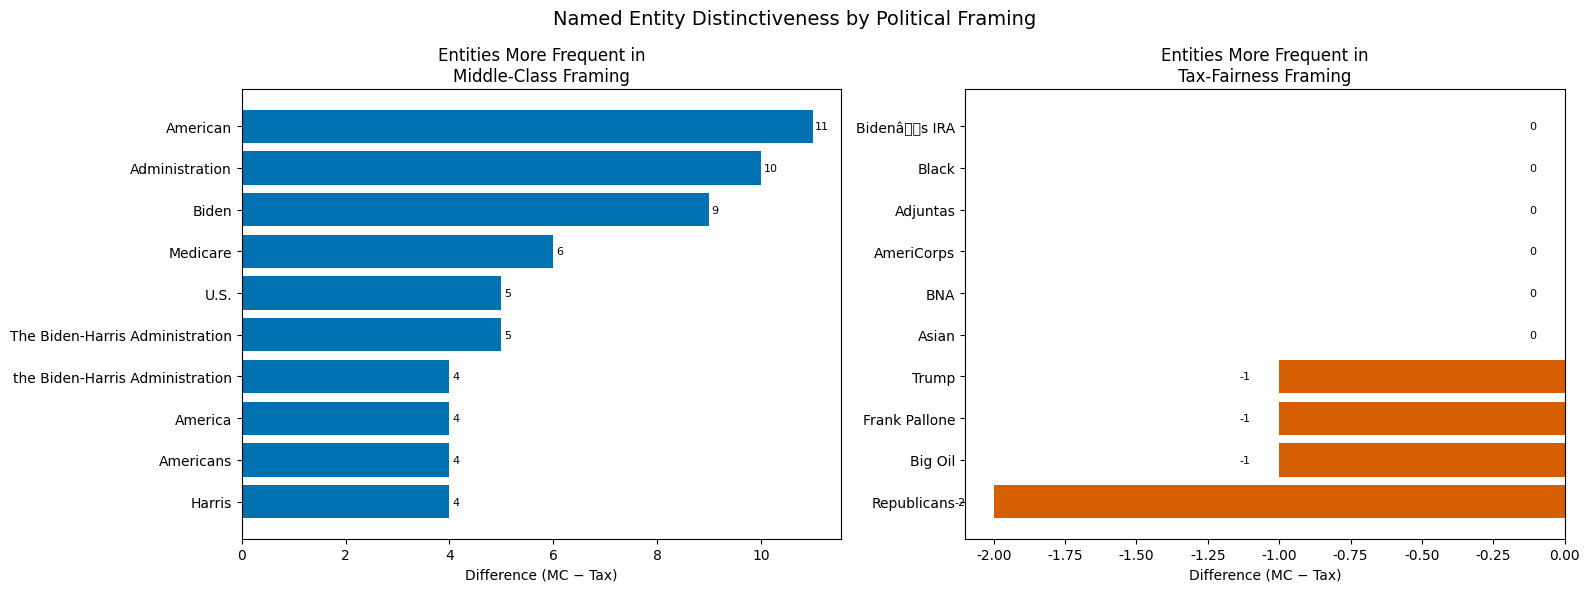

In [19]:


def extract_ner_with_label(text):
    """
    Extract named entities using SpaCy.
    Return list of (entity text, entity label).
    Example: [("American families", "NORP"), ("United States", "GPE")]
    """
    if not isinstance(text, str) or not text.strip():
        return []
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Perform NER on filtered framing-related sentences
econ_df["entities"] = econ_df["filtered_text"].apply(extract_ner_with_label)

print("Example extracted entities:")
display(econ_df[["filtered_text", "entities"]].head(3))

# explode: one document → multiple rows of entities
exploded = econ_df[[
    "middle_class_frame",
    "tax_fairness_frame",
    "entities"
]].explode("entities")

# remove rows without entity
exploded = exploded.dropna(subset=["entities"]).copy()

# split entity text and entity type
exploded["entity"] = exploded["entities"].apply(lambda x: x[0])
exploded["label"]  = exploded["entities"].apply(lambda x: x[1])

# keep only useful human/political/geographic/organization entities
valid_labels = ["PERSON", "ORG", "GPE", "NORP", "FAC"]
filtered = exploded[exploded["label"].isin(valid_labels)].copy()

print("Sample NER expansion:")
display(filtered.head(10))

# Frequency counts in Middle-Class vs Tax-Fairness framing
entity_table = filtered.groupby("entity").agg(
    mc=("middle_class_frame", "sum"),     # appears in Middle-Class context (#docs)
    tax=("tax_fairness_frame", "sum")     # appears in Tax-Fairness context (#docs)
)

# diff: positive → Middle-Class distinctive; negative → Tax-Fairness distinctive
entity_table["diff"] = entity_table["mc"] - entity_table["tax"]

# select strongest differences (Top-10 for each side)
top_mc  = entity_table.sort_values("diff", ascending=False).head(10)
top_tax = entity_table.sort_values("diff", ascending=True).head(10)

print("\n====== Top-10 Entities More Frequent in Middle-Class Framing ======")
display(top_mc)

print("\n====== Top-10 Entities More Frequent in Tax-Fairness Framing ======")
display(top_tax)

import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

color_mc  = "#0072B2"   # Blue — Middle Class
color_tax = "#D55E00"   # Orange — Tax Fairness

# ----- Left: Middle-Class distinctive entities -----
mc_plot = top_mc.sort_values("diff")  # sort for nice Y-axis order
axes[0].barh(mc_plot.index, mc_plot["diff"], color=color_mc)
axes[0].set_title("Entities More Frequent in\nMiddle-Class Framing")
axes[0].set_xlabel("Difference (MC − Tax)")

for i, v in enumerate(mc_plot["diff"]):
    axes[0].text(v + 0.05, i, f"{v:.0f}", va="center", fontsize=8)

# ----- Right: Tax-Fairness distinctive entities -----
tax_plot = top_tax.sort_values("diff")
axes[1].barh(tax_plot.index, tax_plot["diff"], color=color_tax)
axes[1].set_title("Entities More Frequent in\nTax-Fairness Framing")
axes[1].set_xlabel("Difference (MC − Tax)")

for i, v in enumerate(tax_plot["diff"]):
    axes[1].text(v - 0.1, i, f"{v:.0f}", va="center", fontsize=8, ha="right")

plt.suptitle("Named Entity Distinctiveness by Political Framing", fontsize=14)
plt.tight_layout()
plt.show()


